In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.get_cluster import cluster_os_new2


from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from tqdm.notebook import tqdm

In [27]:
df = pd.read_excel('N = 500 Q_Normal seed = 10 dt = 0.1 230821 ver3.xlsm',index_col=[0,1])
ms = df.reset_index().m.unique()

In [28]:
df_Km = df.copy()

In [29]:
print(*df.columns)

r rstd rMM error c0 c1 c2 c3 c4 c5 c6 c7 c8 c9 c0 phase vel c1 phase vel c2 phase vel c3 phase vel c4 phase vel c5 phase vel c6 phase vel c7 phase vel c8 phase vel c9 phase vel c0 omega c1 omega c2 omega c3 omega c4 omega c5 omega c6 omega c7 omega c8 omega c9 omega


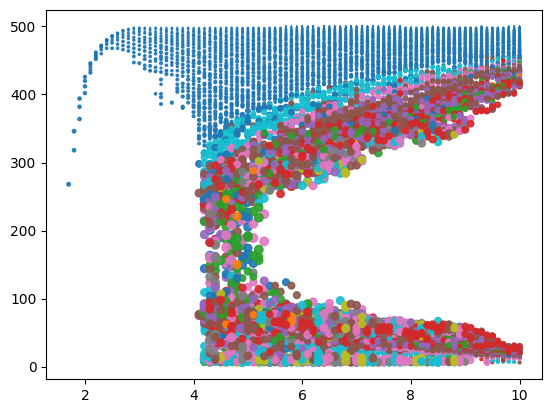

In [106]:
check_list_m = []
check_list_K = []

for i in range(100):
    ms = df_Km.reset_index().m.unique()
    re_df = df_Km.reset_index()

    df_m = re_df[re_df.m == ms[i]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.iloc[:,5:15]
    cluster_o = df_m.iloc[:,15:25]
    len_cluster = (~cluster_o.isna()).sum(axis=1).to_numpy()
    plt.scatter(np.ones((10,101))*Ks,cluster_s.to_numpy().T,alpha=0.9,
                c=np.ones((10,101))*(len_cluster),s=50*np.ones((10,101))*rMM,cmap='tab10')
    # plt.colorbar()
    len_cluster = (~cluster_o.isna()).sum(axis=1)
    if ms[i]>=5:
        is_na = df_m.K.loc[df_m.K>4.1][len_cluster ==1].to_numpy()
        
        if len(is_na) !=0:
            # print(ms[i],is_na)
            for K in is_na:
                check_list_K.append(K)
                check_list_m.append(ms[i])



In [107]:
len(check_list_K)

241

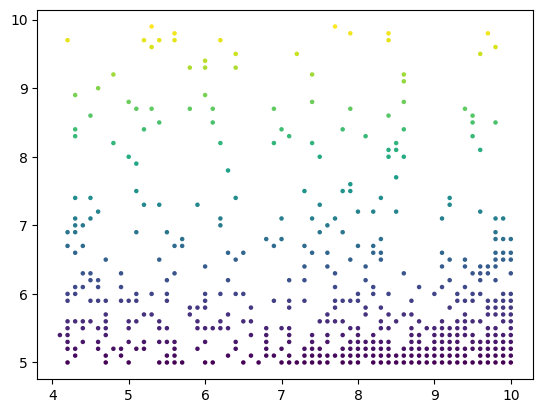

In [105]:
plt.scatter(check_list_K,check_list_m,s=5,c=check_list_m)

In [100]:
re_check_list_m = [] 
re_check_list_K = []
for m,K in list(zip(check_list_m,check_list_K)):
    if K > 4.1:
        re_check_list_m.append(m)
        re_check_list_K.append(K)

In [101]:
len(re_check_list_m)

477

In [102]:
len(list(zip(re_check_list_m,re_check_list_K)))

477

In [104]:

for i, (m,K) in enumerate(list(zip(re_check_list_m,re_check_list_K))):
        seed =10
        N = 500
        theta_init,omega,Kc = Q_Normal(N,0,1,seed=seed)
        omega = np.sort(omega) 
        t_end = 4000
        dt =0.1
        t = np.arange(0,t_end,dt)
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= 0*omega,p_omega=omega,result_time = int((t_end)-(350))*int(1/dt))
        if m == 0:
                dtheta = np.c_[dtheta[0],dtheta.T].T
        r_c = np.cumsum(rs,axis=0)
        sum_time = 150*int(1/dt)
        t_sum = t[sum_time:]
        avg_r_set = (r_c[sum_time:]-r_c[:-sum_time])/sum_time

        r_duration = rs[-5000:]
        r = np.mean(r_duration,axis=0)
        rstd = np.std(r_duration,axis=0)
        rMM = (np.max(r_duration,axis=0)-np.min(r_duration,axis=0))

        sum_time = 1500
        dtheta_c = np.cumsum(dtheta,axis=0)
        avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

        c_threshold = np.where(r<0.1,1e-5,3e-4)
        CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG=avg_dtheta,check=c_threshold,c_size=5,N=N,omega=omega)
        dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
        dtype2 = [('cluster size', int), ('cluster mean natural frequency', float)]
        CSMP = np.array([(S,P) for S,P in zip(CS,CMP)],dtype=dtype)
        CSMO = np.array([(S,O) for S,O in zip(CS,CMO)],dtype=dtype2)
        
        print(i)
        df_Km.loc[(K,m),"r"] = r
        df_Km.loc[(K,m),"rstd"] = rstd
        df_Km.loc[(K,m),"rMM"] = rMM
        df_Km.loc[(K,m),'error'] = np.nan
        for i in range(len(CSMO)):
                df_Km.loc[(K,m),f'c{i}'] = CSMP['cluster size'][i]
                df_Km.loc[(K,m),f'c{i} phase vel'] = CSMP['cluster mean phase velocity'][i]
                df_Km.loc[(K,m),f'c{i} omega'] = CSMO['cluster mean natural frequency'][i]
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [58]:
df_Km.sort_index().to_excel(f'N = 500 Q_Normal seed = 10 dt = 0.1 230821 ver3.xlsm')

In [16]:
K,m

(3.0, 0.6000000000000001)

In [14]:
K,m,CSMP

(2.6,
 1.1,
 array([(490, 0.02295533)],
       dtype=[('cluster size', '<i8'), ('cluster mean phase velocity', '<f8')]))

In [ ]:

for m,(r,rstd,rMM,CSMP_set,CSMO_set,error_set,C_s_set,C_e_set) in zip(ms,parmap.map(C_rsmso_set_new,ms,K_set=K_set,N=N,theta_init_set=theta_init_set,
                                                    omega_set=omega_set,pdtheta_set = pdtheta_set,t_end=2000,dt=0.01,
                                                    pm_pbar=True, pm_processes=core)):
    for i,K in enumerate(K_set.reshape(-1)):
        df_Km.loc[(K,m),"r"] = r[i]
        df_Km.loc[(K,m),"rstd"] = rstd[i]
        df_Km.loc[(K,m),"rMM"] = rMM[i]
        df_Km.loc[(K,m),'error'] = error_set[i]
        CSMP = CSMP_set[i]
        CSMO = CSMO_set[i]
        for i in range(len(CSMP_set[i])):
                df_Km.loc[(K,m),f'c{i}'] = CSMP['cluster size'][i]
                df_Km.loc[(K,m),f'c{i} phase vel'] = CSMP['cluster mean phase velocity'][i]
                df_Km.loc[(K,m),f'c{i} omega'] = CSMO['cluster mean natural frequency'][i]



In [63]:
df = df_Km.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']

df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy(dtype = float)
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy(dtype = float)
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        else:
                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

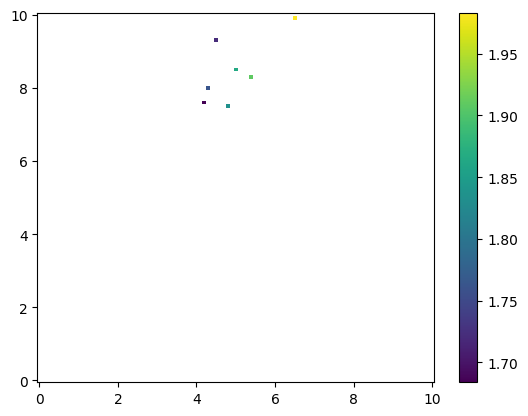

In [82]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_new['p_o_2'].unstack().to_numpy().T)
plt.colorbar()
# plt.xlim(1,3)

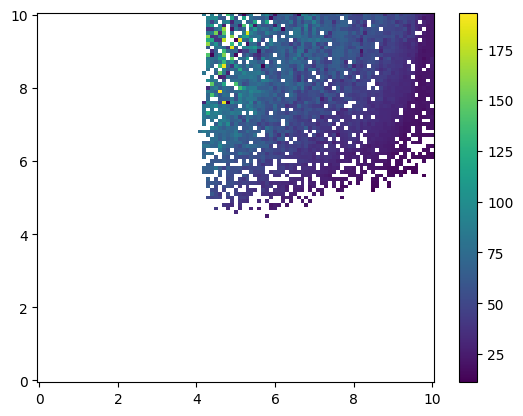

In [110]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T)
plt.colorbar()